## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

## Importing the Data and Preprocessing

In [2]:
raw_csv_data = pd.read_csv("/content/Index2018.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date",inplace=True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method="ffill")

In [3]:
df_comp['market_value'] = df_comp.ftse

In [4]:
df_comp.head()

,spx,dax,ftse,nikkei,market_value
date,,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01,3445.98
1994-01-10,475.27,2225.00,3440.58,18443.44,3440.58
1994-01-11,474.13,2228.10,3413.77,18485.25,3413.77
1994-01-12,474.17,2182.06,3372.02,18793.88,3372.02
1994-01-13,472.47,2142.37,3360.01,18577.26,3360.01


In [5]:
#del df_comp["spx"]
del df_comp["dax"]
del df_comp["ftse"]
del df_comp["nikkei"]
size = int(len(df_comp)*0.80)
df,df_test = df_comp.iloc[:size],df_comp.iloc[size:]

## LLR Test

In [6]:
def LLR_test(mod_1,mod_2,DF=1):
  L1 = mod_1.fit(start_ar_lags = 11).llf
  L2 = mod_2.fit(start_ar_lags = 11).llf
  LR = (2*(L2-L1))
  p = chi2.sf(LR,DF).round(3)
  return p

## Creating Returns

In [7]:
df['returns'] =  df.market_value.pct_change(1)*100

## ARIMA(1,1,1)

In [8]:
model_ar_1_i_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_i_1_ma_1 = model_ar_1_i_1_ma_1.fit()
print(results_ar_1_i_1_ma_1.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 14 Nov 2022   AIC                          55215.333
Time:                        09:27:13   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.D.market_value     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.D.mark

## Residuals of the ARIMA(1,1,1)

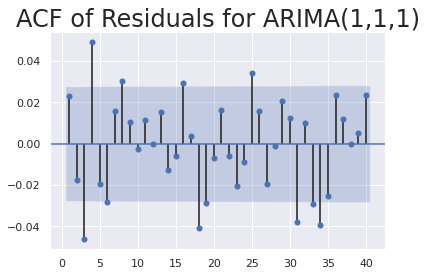

In [9]:
df['results_ar_1_i_1_ma_1'] = results_ar_1_i_1_ma_1.resid
sgt.plot_acf(df.results_ar_1_i_1_ma_1[1:], lags = 40, zero= False)
plt.title("ACF of Residuals for ARIMA(1,1,1)",size=24)
plt.show()

Higher-lag ARIMA Model

In [10]:
model_ar_1_i_1_ma_2 = ARIMA(df.market_value, order=(1,1,2))
results_ar_1_i_1_ma_2 = model_ar_1_i_1_ma_2.fit()

model_ar_1_i_1_ma_3 = ARIMA(df.market_value, order=(1,1,3))
results_ar_1_i_1_ma_3 = model_ar_1_i_1_ma_3.fit()

model_ar_2_i_1_ma_1 = ARIMA(df.market_value, order=(2,1,1))
results_ar_2_i_1_ma_1 = model_ar_2_i_1_ma_1.fit()

model_ar_3_i_1_ma_1 = ARIMA(df.market_value, order=(3,1,1))
results_ar_3_i_1_ma_1 = model_ar_3_i_1_ma_1.fit()

model_ar_3_i_1_ma_2 = ARIMA(df.market_value, order=(3,1,2))
results_ar_3_i_1_ma_2 = model_ar_3_i_1_ma_2.fit(start_ar_lags = 5)



In [11]:
print("\n ARMA(1,1,1): \tLL = ", results_ar_1_i_1_ma_1.llf,"\tAIC = ", results_ar_1_i_1_ma_1.aic)

print("\n ARMA(1,1,2): \tLL = ", results_ar_1_i_1_ma_2.llf,"\tAIC = ", results_ar_1_i_1_ma_2.aic)

print("\n ARMA(1,1,3): \tLL = ", results_ar_1_i_1_ma_3.llf,"\tAIC = ", results_ar_1_i_1_ma_3.aic)

print("\n ARMA(2,1,1): \tLL = ", results_ar_2_i_1_ma_1.llf,"\tAIC = ", results_ar_2_i_1_ma_1.aic)

print("\n ARMA(3,1,1): \tLL = ", results_ar_3_i_1_ma_1.llf,"\tAIC = ", results_ar_3_i_1_ma_1.aic)

print("\n ARMA(3,1,2): \tLL = ", results_ar_3_i_1_ma_2.llf,"\tAIC = ", results_ar_3_i_1_ma_2.aic)




 ARMA(1,1,1): 	LL =  -27603.666412774845 	AIC =  55215.33282554969

 ARMA(1,1,2): 	LL =  -27600.081863139967 	AIC =  55210.163726279934

 ARMA(1,1,3): 	LL =  -27590.424032545823 	AIC =  55192.848065091646

 ARMA(2,1,1): 	LL =  -27599.80748784872 	AIC =  55209.61497569744

 ARMA(3,1,1): 	LL =  -27592.05537170885 	AIC =  55196.1107434177

 ARMA(3,1,2): 	LL =  -27590.660808987082 	AIC =  55195.321617974165


In [12]:
print("\nLLR Test p-value " + str(LLR_test(model_ar_1_i_1_ma_2,model_ar_1_i_1_ma_3)))


LLR Test p-value 0.0


In [13]:
print("\nLLR Test p-value " + str(LLR_test(model_ar_1_i_1_ma_1,model_ar_1_i_1_ma_3)))


LLR Test p-value 0.0


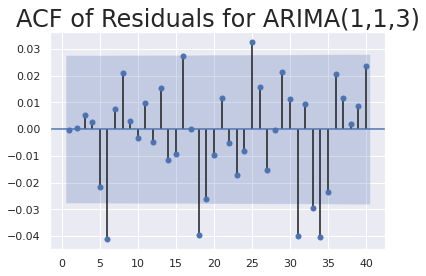

In [14]:
df['results_ar_1_i_1_ma_3'] = results_ar_1_i_1_ma_3.resid.iloc[:]
sgt.plot_acf(df.results_ar_1_i_1_ma_3[1:], lags = 40, zero= False)
plt.title("ACF of Residuals for ARIMA(1,1,3)",size=24)
plt.show()

In [15]:
model_ar_5_i_1_ma_1 = ARIMA(df.market_value, order=(5,1,1))
results_ar_5_i_1_ma_1 = model_ar_5_i_1_ma_1.fit(start_ar_lags = 11)

model_ar_6_i_1_ma_3 = ARIMA(df.market_value, order=(6,1,3))
results_ar_6_i_1_ma_3 = model_ar_6_i_1_ma_3.fit(start_ar_lags = 11)


In [16]:
print("\n ARMA(1,1,3): \tLL = ", results_ar_1_i_1_ma_3.llf,"\tAIC = ", results_ar_1_i_1_ma_3.aic)
print("\n ARMA(5,1,1): \tLL = ", results_ar_5_i_1_ma_1.llf,"\tAIC = ", results_ar_5_i_1_ma_1.aic)
print("\n ARMA(6,1,3): \tLL = ", results_ar_6_i_1_ma_3.llf,"\tAIC = ", results_ar_6_i_1_ma_3.aic)


 ARMA(1,1,3): 	LL =  -27590.424032545823 	AIC =  55192.848065091646

 ARMA(5,1,1): 	LL =  -27586.51188812616 	AIC =  55189.02377625232

 ARMA(6,1,3): 	LL =  -27583.565320399106 	AIC =  55189.13064079821


In [17]:
print("\nLLR Test p-value " + str(LLR_test(model_ar_1_i_1_ma_3,model_ar_6_i_1_ma_3, DF=5)))


LLR Test p-value 0.018


In [18]:
print("\nLLR Test p-value " + str(LLR_test(model_ar_5_i_1_ma_1,model_ar_6_i_1_ma_3, DF=3)))


LLR Test p-value 0.117


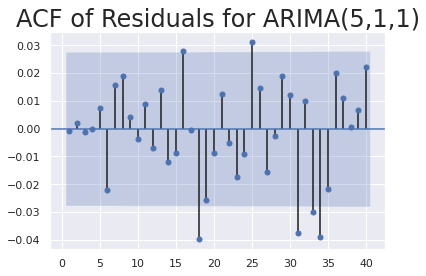

In [19]:
df['results_ar_5_i_1_ma_1'] = results_ar_5_i_1_ma_1.resid
sgt.plot_acf(df.results_ar_5_i_1_ma_1[1:], lags = 40, zero= False)
plt.title("ACF of Residuals for ARIMA(5,1,1)",size=24)
plt.show()

In [20]:
print(results_ar_5_i_1_ma_1.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -27586.512
Method:                       css-mle   S.D. of innovations             58.932
Date:                Mon, 14 Nov 2022   AIC                          55189.024
Time:                        09:27:55   BIC                          55241.193
Sample:                    01-10-1994   HQIC                         55207.305
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5662      0.690      0.820      0.412      -0.787       1.919
ar.L1.D.market_value     0.4011      0.159      2.530      0.011       0.090       0.712
ar.L2.D.mark

## Models with Higher Level of Integration

In [21]:
df['delta_prices'] = df.market_value.diff(1)

In [22]:
model_delta_ar_1_i_1_ma_1 = ARIMA(df.delta_prices[1:], order=(1,0,1))
results_delta_ar_1_i_1_ma_1 = model_delta_ar_1_i_1_ma_1.fit()
print(results_delta_ar_1_i_1_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:           delta_prices   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood              -27603.666
Method:                       css-mle   S.D. of innovations             59.134
Date:                Mon, 14 Nov 2022   AIC                          55215.333
Time:                        09:27:57   BIC                          55241.418
Sample:                    01-10-1994   HQIC                         55224.473
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.5655      0.682      0.829      0.407      -0.772       1.903
ar.L1.delta_prices     0.7475      0.070     10.652      0.000       0.610       0.885
ma.L1.delta_prices  

In [23]:
sts.adfuller(df.delta_prices[1:])

(-32.244093495707475,
 0.0,
 5,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54845.96104221891)

In [24]:
model_ar_1_i_2_ma_1 = ARIMA(df.market_value, order=(1,2,1))
results_ar_1_i_2_ma_1 = model_ar_1_i_2_ma_1.fit(start_ar_lags = 10)
print(results_ar_1_i_2_ma_1.summary())

                             ARIMA Model Results                              
Dep. Variable:        D2.market_value   No. Observations:                 5019
Model:                 ARIMA(1, 2, 1)   Log Likelihood              -27614.165
Method:                       css-mle   S.D. of innovations             59.274
Date:                Mon, 14 Nov 2022   AIC                          55236.331
Time:                        09:27:59   BIC                          55262.415
Sample:                    01-11-1994   HQIC                         55245.471
                         - 04-05-2013                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0001      0.001     -0.200      0.841      -0.001       0.001
ar.L1.D2.market_value    -0.0178      0.014     -1.262      0.207      -0.045       0.010
ma.L1.D2

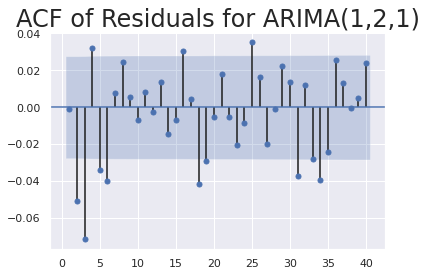

In [25]:
df['results_ar_1_i_2_ma_1'] = results_ar_1_i_2_ma_1.resid.iloc[:]
sgt.plot_acf(df.results_ar_1_i_2_ma_1[2:], lags = 40, zero= False)
plt.title("ACF of Residuals for ARIMA(1,2,1)",size=24)
plt.show()

##ARIMAX

In [26]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df.market_value, exog = df.spx , order=(1,1,1))
results_ar_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()
print(results_ar_1_i_1_ma_1_Xspx.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.market_value   No. Observations:                 5020
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -27603.556
Method:                       css-mle   S.D. of innovations             59.132
Date:                Mon, 14 Nov 2022   AIC                          55217.112
Time:                        09:28:01   BIC                          55249.718
Sample:                    01-10-1994   HQIC                         55228.538
                         - 04-05-2013                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5874      2.655     -0.221      0.825      -5.790       4.616
spx                      0.0011      0.002      0.451      0.652      -0.004       0.006
ar.L1.D.mark

## SARIMAX

In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [30]:
model_sarimax = SARIMAX(df.market_value, exog = df.spx , order=(1,0,1), seasonal_order = (2,0,1,5))
results_sarimax = model_sarimax.fit()
print(results_sarimax.summary())

                                     SARIMAX Results                                     
Dep. Variable:                      market_value   No. Observations:                 5021
Model:             SARIMAX(1, 0, 1)x(2, 0, 1, 5)   Log Likelihood              -26712.576
Date:                           Mon, 14 Nov 2022   AIC                          53439.152
Time:                                   09:44:28   BIC                          53484.802
Sample:                               01-07-1994   HQIC                         53455.148
                                    - 04-05-2013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
spx            2.7045      0.034     78.637      0.000       2.637       2.772
ar.L1          0.9999      0.000   2671.878